<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




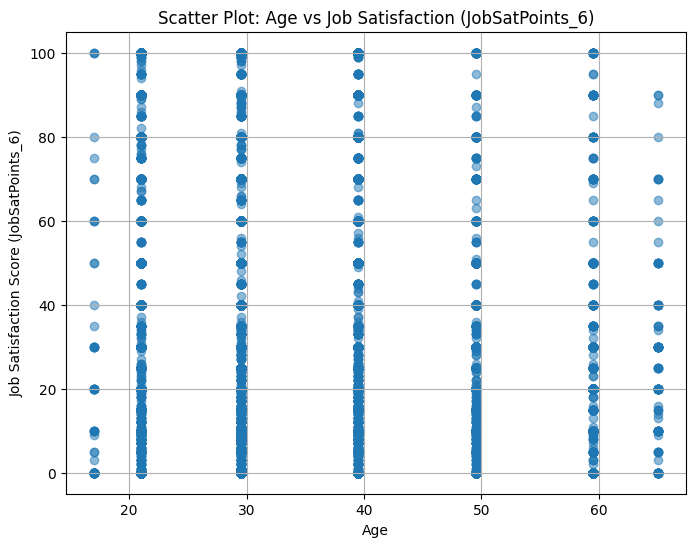

In [4]:
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age_to_num)

import matplotlib.pyplot as plt

# Drop missing values for Age_numeric and JobSatPoints_6
plot_data = df.dropna(subset=['Age_numeric', 'JobSatPoints_6'])

plt.figure(figsize=(8,6))
plt.scatter(plot_data['Age_numeric'], plot_data['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot: Age vs Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


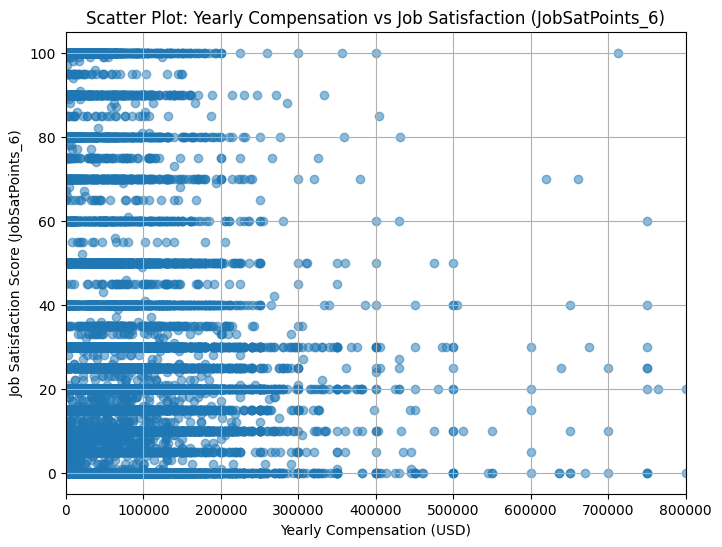

In [6]:
import matplotlib.pyplot as plt

# Drop rows with missing compensation or job satisfaction
plot_data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

plt.figure(figsize=(8,6))
plt.scatter(plot_data['ConvertedCompYearly'], plot_data['JobSatPoints_6'], alpha=0.5)
plt.xlim(0, 800000)
plt.title('Scatter Plot: Yearly Compensation vs Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [10]:
!pip install seaborn



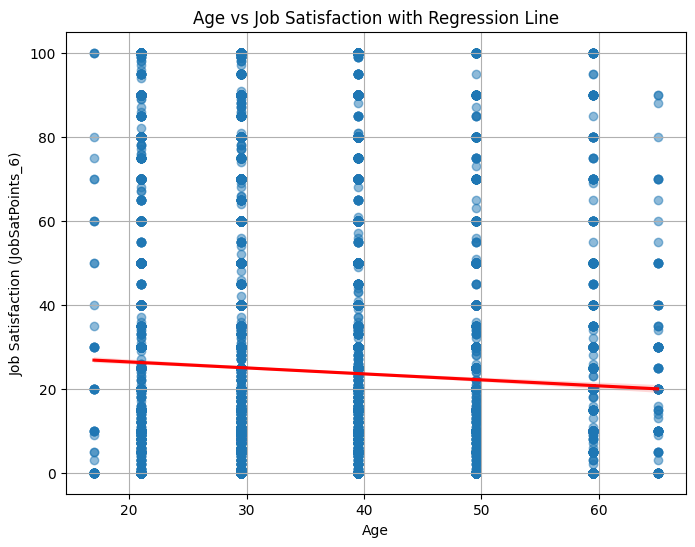

In [13]:
import seaborn as sns
import numpy as pd
# Drop missing values
plot_data = df.dropna(subset=['Age_numeric', 'JobSatPoints_6'])

plt.figure(figsize=(8,6))
sns.regplot(data=plot_data, x='Age_numeric', y='JobSatPoints_6', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


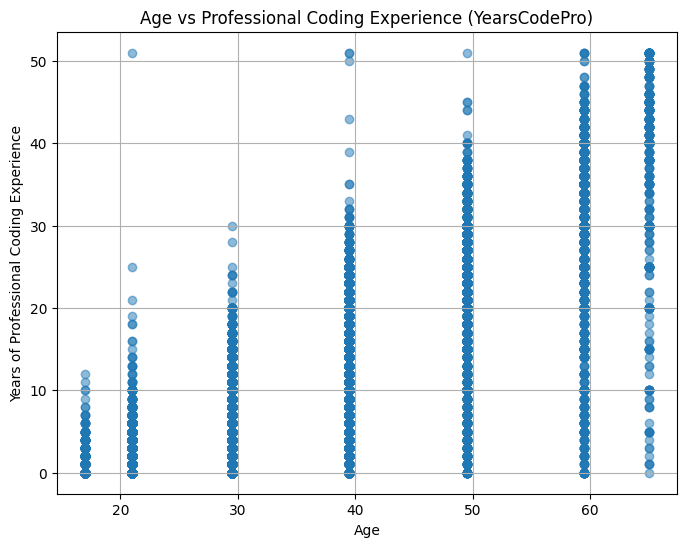

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert Age to numeric midpoint values
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Function to convert YearsCodePro to numeric
def convert_years(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

# Apply conversions
df['Age_numeric'] = df['Age'].apply(convert_age_to_num)
df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing values in either column
plot_data = df.dropna(subset=['Age_numeric', 'YearsCodePro_num'])

# Plot scatter plot
plt.figure(figsize=(8,6))
plt.scatter(plot_data['Age_numeric'], plot_data['YearsCodePro_num'], alpha=0.5)
plt.title('Age vs Professional Coding Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


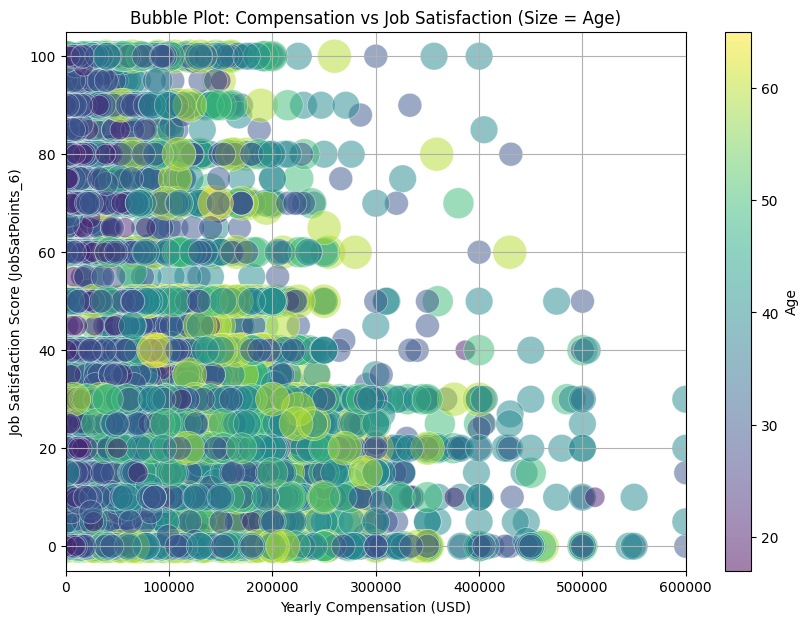

In [23]:
import matplotlib.pyplot as plt

# Make sure Age_numeric is prepared (if not, run conversion from previous)
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age_to_num)

# Filter out rows with missing data in relevant columns
plot_data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Scale bubble sizes to look better on plot
sizes = plot_data['Age_numeric'] * 10  # adjust multiplier as needed

plt.figure(figsize=(10,7))
scatter = plt.scatter(
    plot_data['ConvertedCompYearly'], 
    plot_data['JobSatPoints_6'], 
    s=sizes,                # bubble size
    alpha=0.5,
    c=plot_data['Age_numeric'],  # color by age (optional)
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Compensation vs Job Satisfaction (Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.colorbar(scatter, label='Age')
plt.grid(True)
plt.xlim(0, 600000)  # Optional: limit x-axis for better view
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipykernel_1094/2624357505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LanguageList'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')


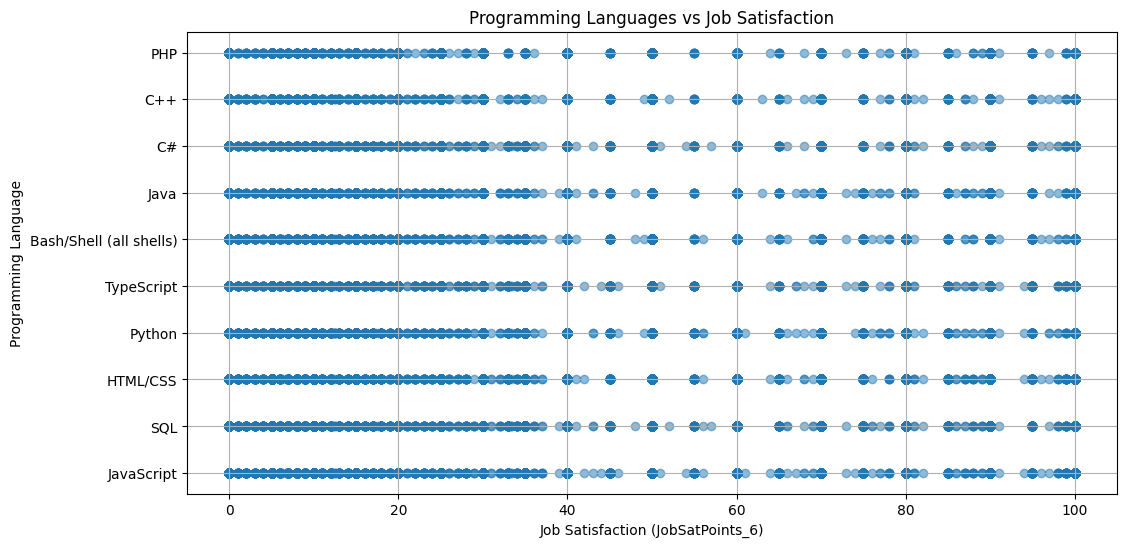

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing Languages or JobSat
df_filtered = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Explode the languages into separate rows
df_filtered['LanguageList'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_filtered.explode('LanguageList')

# Strip whitespace
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# For clearer plot, focus on top N languages by count
top_languages = df_exploded['LanguageList'].value_counts().head(10).index

df_top = df_exploded[df_exploded['LanguageList'].isin(top_languages)]

# Create scatter plot
plt.figure(figsize=(12,6))

# Map languages to numbers for y-axis positions
language_order = list(top_languages)
y_pos = [language_order.index(lang) for lang in df_top['LanguageList']]

plt.scatter(
    df_top['JobSatPoints_6'],  # x = Job Satisfaction score
    y_pos,                     # y = Language index
    alpha=0.5
)

plt.yticks(range(len(language_order)), language_order)
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Programming Language')
plt.title('Programming Languages vs Job Satisfaction')
plt.grid(True)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


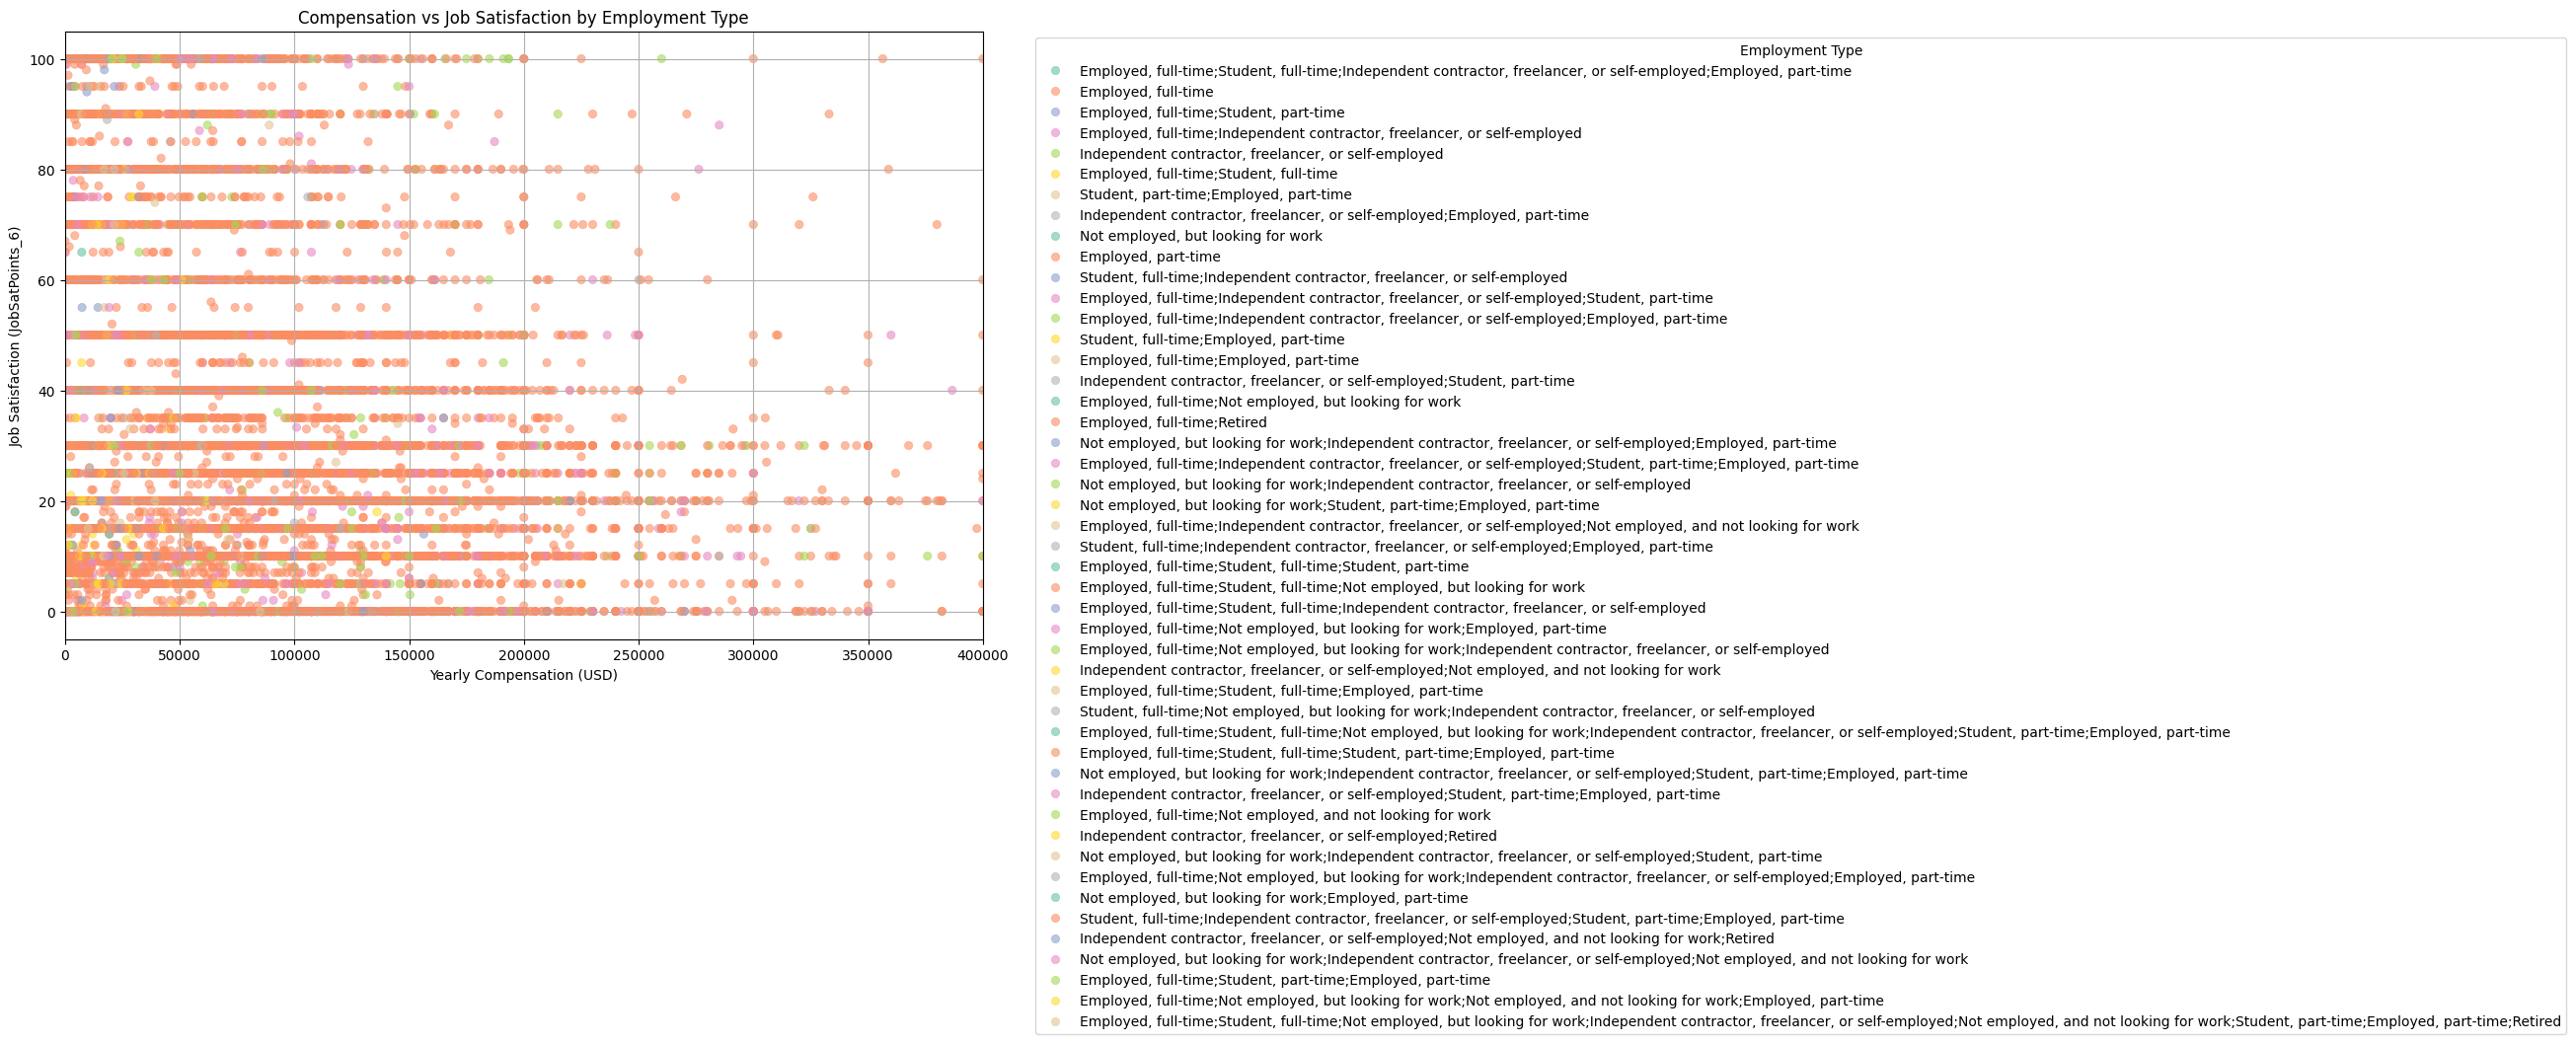

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out missing values
plot_data = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

plt.figure(figsize=(12,8))

sns.scatterplot(
    data=plot_data,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='Set2',
    edgecolor=None
)

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xlim(0, 400000)  # Optional limit to make plot clearer
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


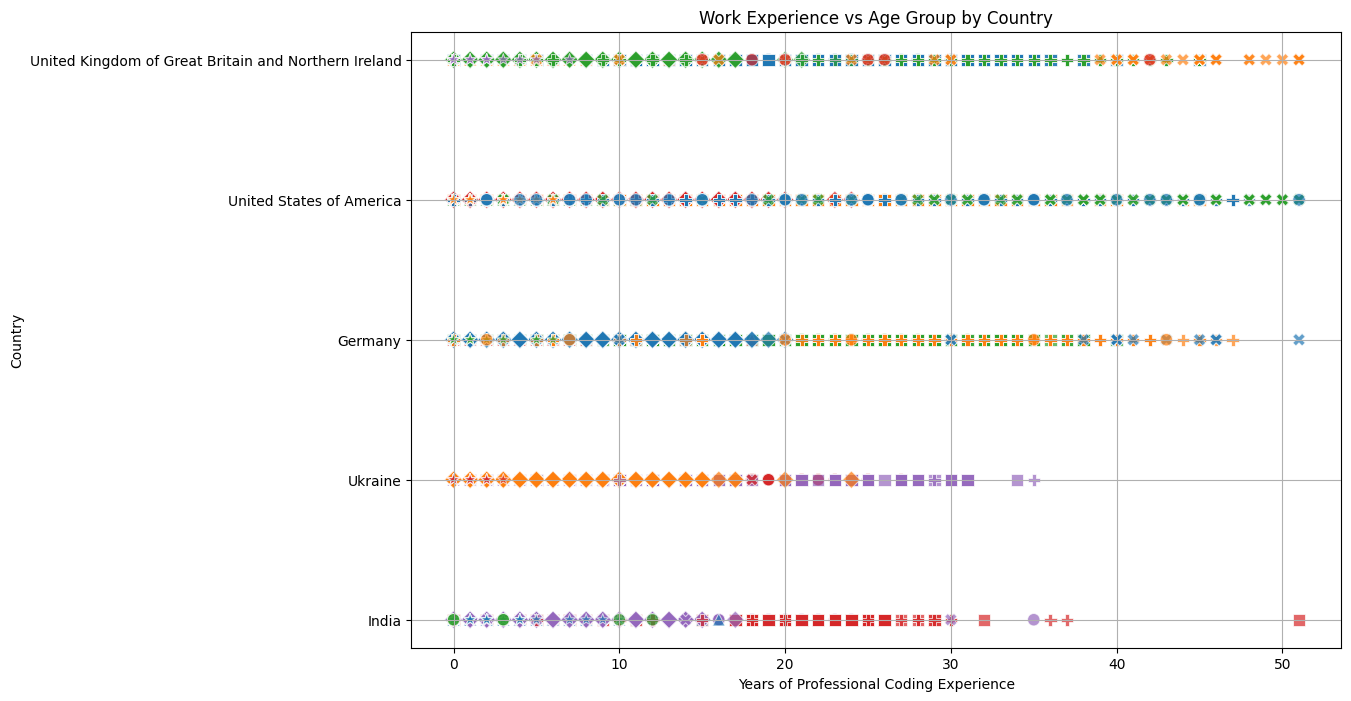

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert YearsCodePro to numeric (reuse your convert_years function if needed)
def convert_years(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

# Filter necessary columns and drop missing values
plot_data = df.dropna(subset=['YearsCodePro_num', 'Age', 'Country'])

# Optional: To avoid overcrowding, select top 5 countries by count
top_countries = plot_data['Country'].value_counts().head(5).index
plot_data = plot_data[plot_data['Country'].isin(top_countries)]

# Map Age groups to markers
age_groups = plot_data['Age'].unique()
markers = ['o', 's', '^', 'D', 'P', 'X', '*']  # more markers if needed
age_marker_dict = {age: markers[i % len(markers)] for i, age in enumerate(age_groups)}

plt.figure(figsize=(12,8))

# Plot scatter points by age group with different markers
for age_group, marker in age_marker_dict.items():
    subset = plot_data[plot_data['Age'] == age_group]
    sns.scatterplot(
        x='YearsCodePro_num', y='Country',
        data=subset,
        hue='Country',
        marker=marker,
        alpha=0.7,
        s=80,
        edgecolor='w',
        legend=False
    )

plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Country')
plt.title('Work Experience vs Age Group by Country')
plt.grid(True)
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
